Title: The Gender Pay Gap

Authors: Ethan Nelson, Zoell Lhomi, Brayden Yorgensen, Lizbeth Montoya, Emily Hernandez, Ashley Cazarez Gomez

# Abstract

This analysis investigates whether a gender pay gap exists within the dataset by comparing total pay across job titles for men and women. The visualizations show that although both genders follow similar overall patterns in compensation, men are more frequently represented in the highest salary ranges. Job-specific comparisons further reveal that in several positions, the maximum pay for men exceeds that of women, indicating a consistent—though modest—gender pay gap. Because the dataset uses the maximum possible pay for each job title rather than actual earnings, the results reflect general structural differences rather than exact wage disparities. Overall, the evidence from the graphs supports the presence of a small but measurable gender pay gap. 

Introduction & Background:

What is the question you hope you can answer? Why is the question important to you? What are you hoping to achieve with the project?

The question that we hope to answer is to see what the pay gap is between men and women. Especially, as it is well known that women are usually underpaid especially within male-dominated fields. This question is important to us because we wanted to explore just how much the pay gap is between men and women and how that gap is represented within different careers. Furthermore, what we hope to achieve from this exploration is to see how big that pay gap is and if it common to see this a specific pay gap across careers.

# Introduction and Background

Generation Z has grown up with the internet—from silly cat videos on YouTube to the recent open AI—research studies that have suggested this constant exposer has made them one of the most socially aware generations. Among the issues they consistently mention, the gender pay gap remains one of the most prominent. Historically all around the world women have been restricted to home and any opportunity to work or pursue a professional career. Over the years as society changed women were able to start working and have numerously proven themselves that they can do anything. However, inequity persist and the gender pay gap reflects the barriers women still must hurdle today. With this project our goal as a group is to bring this unjust to light. We will be breaking down different data sets to show the viewers the difference in women and men's wages or if there is even one to start with.  

Description of the data: Data Used

Where did you get your data?
What data is found in your data set?
Are there any ethical concerns with using the data or how the data was obtained?
Is there a public location where the data is freely available? If so where? If not why?

We got our data from kagglehub as it was the best source to give us data regarding men and women within different careers. Especially, as aside from it giving us information regarding the two genders it also provides us information with education level that the individual has and how that connects to their employment and the pay that they recieve aside from their age and you are able to see how that connects to their employment hierarchy/position within their job.

Therefore, all this is found within the data set that we chose and that helps with answering our prompt of "Gender Pay Gap."

No, there is no ethical concerns with using this data set from kagglehub because as long as you have a kagglehub account or even without you are able to see the dataset as it is open to the public.

There is a public location to where you can access the data freely and that is on kagglehub, you just search for the dataset and can access it freely.

Initial Exploratory Data Analysis:

Definition of all variables (or explanation for why you are not considering some variables) Descriptive statistics for the data set, counts of the variables, value counts (frequency tables) for each categorical variable of interest. Plots that help a reader understand your data. Initial analysis to answer initial data questions.

# Proposed Questions

1. How wide is the Gender pay Gap?
2. Has the gender pay gap improved?
3. Where is the gender pay gap most prominent, where is it not?
4. Why does the gender pay gap happen?

# Data Used

In [35]:
import os

print(os.listdir('/Users/ethannelson614/.cache/kagglehub/datasets/nilimajauhari/glassdoor-analyze-gender-pay-gap/versions/1'
))


['Glassdoor Gender Pay Gap.csv']


In [36]:
import os
import pandas as pd 
path = '/Users/ethannelson614/.cache/kagglehub/datasets/nilimajauhari/glassdoor-analyze-gender-pay-gap/versions/1'
print('Available files:', os.listdir(path))

Available files: ['Glassdoor Gender Pay Gap.csv']


NOTE: It is also important to acknowledge a limitation of the dataset: the values reflect the highest possible pay for each job title. As a result, factors such as regional wage variation, company-specific pay structures, signing bonuses, and other compensation elements are not captured in this analysis. 

In [37]:
file_name = path + '/' + os.listdir(path)[0]
pd.read_csv(file_name)

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319
...,...,...,...,...,...,...,...,...,...
995,Marketing Associate,Female,61,1,High School,Administration,1,62644,3270
996,Data Scientist,Male,57,1,Masters,Sales,2,108977,3567
997,Financial Analyst,Male,48,1,High School,Operations,1,92347,2724
998,Financial Analyst,Male,65,2,High School,Administration,1,97376,2225


# Exploratory Data Analysis

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
DF_masked = DF[DF["Gender"] != "Male"]
x = DF_masked["Bonus"]         
y = DF_masked["BasePay"]
plt.show()

# Plot 1

Columns: ['jobtitle', 'gender', 'age', 'perfeval', 'education', 'dept', 'seniority', 'basepay', 'bonus']
Using columns: jobtitle gender basepay
gender                   female          male   gap_pct
jobtitle                                               
Data Scientist     95704.792453  89222.629630 -7.265156
Driver             86867.630435  91952.666667  5.530058
Financial Analyst  95458.326531  94607.034483 -0.899819
Graphic Designer   92243.291667  89595.800000 -2.954928
IT                 90475.720000  91021.978261  0.600139


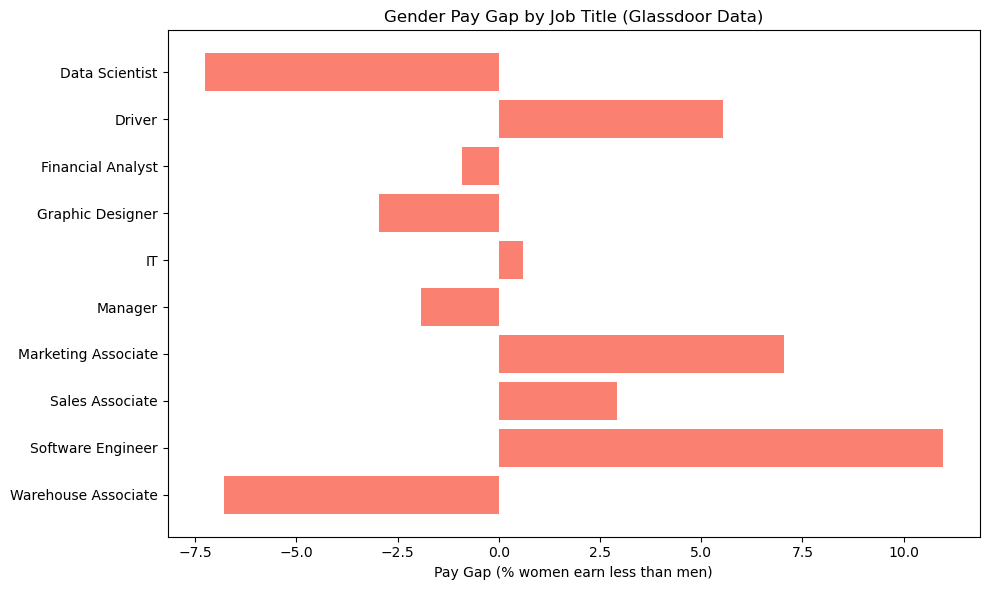

In [39]:
import os
file = [f for f in os.listdir(path) if f.endswith(".csv")][0]
df = pd.read_csv(os.path.join(path, file))
df.columns = df.columns.str.lower().str.replace(" ", "").str.replace("-", "")
print("Columns:", df.columns.tolist())
gender_col = [c for c in df.columns if "gender" in c][0]
salary_col = [c for c in df.columns if "salary" in c or "pay" in c][0]
job_col    = [c for c in df.columns if "job" in c][0]
print("Using columns:", job_col, gender_col, salary_col)
df[gender_col] = df[gender_col].astype(str).str.lower().str[0]
df[gender_col] = df[gender_col].replace({"m": "male", "f": "female"})
df = df.dropna(subset=[gender_col, salary_col])
grouped = df.groupby([job_col, gender_col])[salary_col].mean().unstack()
grouped = grouped.dropna()
grouped["gap_pct"] = (grouped["male"] - grouped["female"]) / grouped["male"] * 100
print(grouped.head())
plt.figure(figsize=(10, 6))
plt.barh(grouped.index, grouped["gap_pct"], color="salmon")
plt.xlabel("Pay Gap (% women earn less than men)")
plt.title("Gender Pay Gap by Job Title (Glassdoor Data)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Plot 2

Columns: ['jobtitle', 'gender', 'age', 'perfeval', 'education', 'dept', 'seniority', 'basepay', 'bonus']
Using columns: jobtitle gender basepay
gender                   female          male
jobtitle                                     
Data Scientist     95704.792453  89222.629630
Driver             86867.630435  91952.666667
Financial Analyst  95458.326531  94607.034483
Graphic Designer   92243.291667  89595.800000
IT                 90475.720000  91021.978261


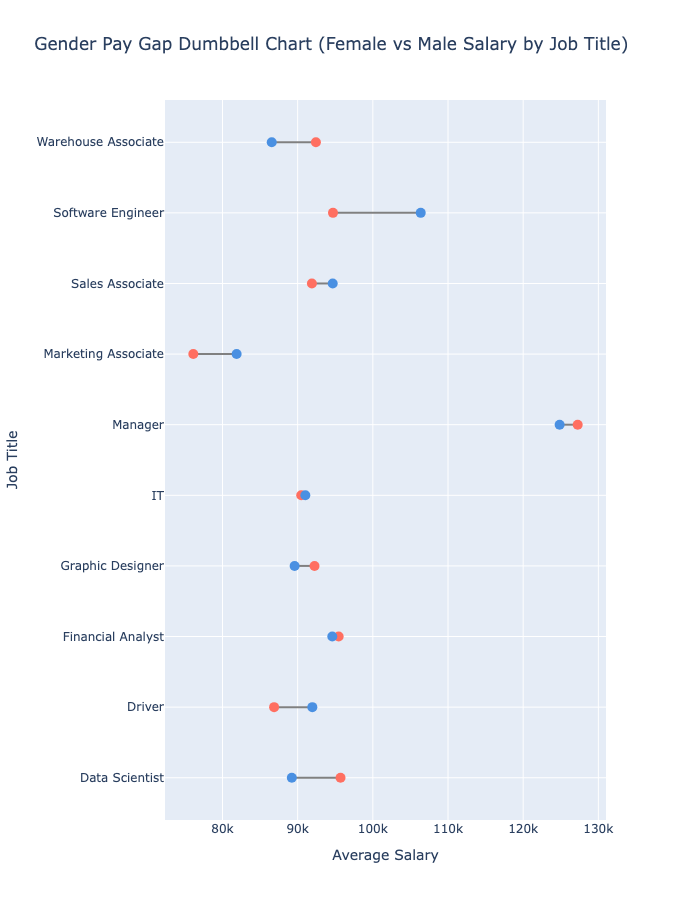

In [40]:
file = [f for f in os.listdir(path) if f.endswith(".csv")][0]
df = pd.read_csv(os.path.join(path, file))
df.columns = df.columns.str.lower().str.replace(" ", "").str.replace("-", "")
print("Columns:", df.columns.tolist())
gender_col = [c for c in df.columns if "gender" in c][0]
salary_col = [c for c in df.columns if "salary" in c or "pay" in c][0]
job_col    = [c for c in df.columns if "job" in c][0]
print("Using columns:", job_col, gender_col, salary_col)
df[gender_col] = df[gender_col].astype(str).str.lower().str[0]
df[gender_col] = df[gender_col].replace({"m": "male", "f": "female"})
df = df.dropna(subset=[gender_col, salary_col])
grouped = df.groupby([job_col, gender_col])[salary_col].mean().unstack()
grouped = grouped.dropna()
print(grouped.head())
fig = go.Figure()
for job in grouped.index:
    male_salary = grouped.loc[job, "male"]
    female_salary = grouped.loc[job, "female"]
    fig.add_trace(go.Scatter(
        x=[female_salary, male_salary],
        y=[job, job],
        mode="lines+markers",
        line=dict(color="gray", width=2),
        marker=dict(size=10, color=["#ff6f61", "#4a90e2"]),  # female = pink, male = blue
        name=job
    ))
fig.update_layout(
    title="Gender Pay Gap Dumbbell Chart (Female vs Male Salary by Job Title)",
    xaxis_title="Average Salary",
    yaxis_title="Job Title",
    height=900,
    showlegend=False
)
fig.show()

# Plot 3

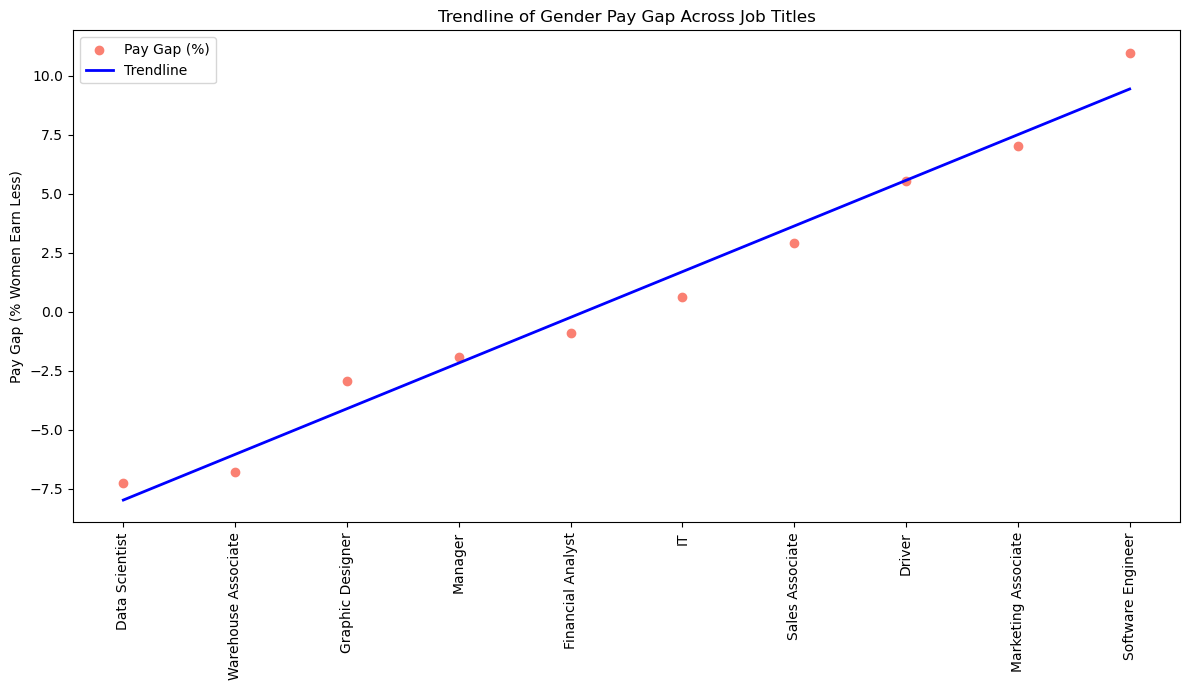

In [41]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
path = kagglehub.dataset_download("nilimajauhari/glassdoor-analyze-gender-pay-gap")
file = [f for f in os.listdir(path) if f.endswith(".csv")][0]
df = pd.read_csv(os.path.join(path, file))
df.columns = df.columns.str.lower().str.replace(" ", "").str.replace("-", "")
gender_col = [c for c in df.columns if "gender" in c][0]
salary_col = [c for c in df.columns if "salary" in c or "pay" in c][0]
job_col    = [c for c in df.columns if "job" in c][0]
df[gender_col] = df[gender_col].astype(str).str.lower().str[0]
df[gender_col] = df[gender_col].replace({"m": "male", "f": "female"})
df = df.dropna(subset=[gender_col, salary_col])
grouped = df.groupby([job_col, gender_col])[salary_col].mean().unstack()
grouped = grouped.dropna()
grouped["gap_pct"] = (grouped["male"] - grouped["female"]) / grouped["male"] * 100
grouped = grouped.sort_values("gap_pct")
x = np.arange(len(grouped))
y = grouped["gap_pct"].values
m, b = np.polyfit(x, y, 1)
trend = m * x + b
plt.figure(figsize=(12, 7))
plt.scatter(x, y, color="salmon", label="Pay Gap (%)")
plt.plot(x, trend, color="blue", linewidth=2, label="Trendline")
plt.xticks(x, grouped.index, rotation=90)
plt.ylabel("Pay Gap (% Women Earn Less)")
plt.title("Trendline of Gender Pay Gap Across Job Titles")
plt.legend()
plt.tight_layout()
plt.show()

# Plot 4

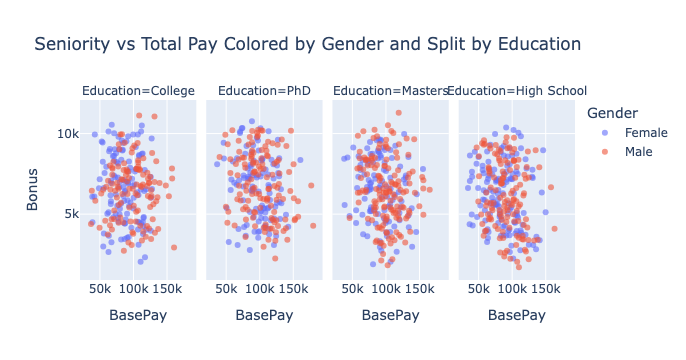

In [42]:
import plotly.express as px 

fig = px.scatter(DF, 

    x="BasePay", 

    y="Bonus", 

    color="Gender", 

    facet_col="Education",    

    title="Seniority vs Total Pay Colored by Gender and Split by Education", 

    opacity=0.6) 

fig.show() 

# Trend Analysis and Results

The overall consensus shows a strong positive relationship between experience and earnings. Across all education levels, employees with more years of service consistently earn higher salaries than those who are newer to the field. The facet panels further illustrate that increased educational attainment is associated with higher pay overall, reinforcing the idea that both experience and credentials contribute to compensation. 

Gender patterns follow a similar upward trajectory for both men and women, though men appear slightly more represented in the higher salary ranges. This suggests a modest gender difference, even when accounting for seniority. 

It is also important to acknowledge a limitation of the dataset: the values reflect the highest possible pay for each job title. As a result, factors such as regional wage variation, company-specific pay structures, signing bonuses, and other compensation elements are not captured in this analysis. 

Across all three visualizations, we can see a consistent pattern of gender-based pay gaps that emerge across job titles. The bar chart reveals the overall percentage pay gap, showing that women earn noticeably less than men in most jobs, with the largest gaps appearing in positions like Software Engineer, Marketing Associate, etc., which are jobs titles that are predominantly male run. In contrast, only a few job titles like Driver or Financial Analyst shows a positive gap where we can see that women earn a bit more. The dumbbell chart supports these findings by directly comparing male and female average salaries within each job title. The distance between the red (female) and blue (male) points indicates that male salaries tend to exceed female salaries across most job titles, which tells us that gender pay differences are not due to random chance but follow a consistent pattern. Together, these three graphs demonstrate that gender-based pay inequalities are persistent across multiple roles in our society with women earning less than men in many job fields.  

# Conclusion

The data provides strong evidence that gender pay differences persists across all types of different job titles in the United States. Although a few roles show that women are earning slightly more, most roles we can see that men are earning much more and reveals consistent disadvantages for female employees both in salary comparisons and the overall percentage gap. The combined outcomes from all three visualizations presented make it clear that these differences are not isolated but rather part of a broader pattern in the workforce. Understanding these gaps and where they occur is an important first step towards addressing them, and the analysis highlights the need for continued attention to pay equity to ensure that there is fair compensation for all employees regardless of their gender.  